In [ ]:
#-Comentar sobre a amostra de dados do prouni

#-Gerar medidas centrais para valores como:

# Cursos que são mais oferecidos
# notas de corte x cursos -> analisar as maiores notas de corte
# Mensalidades(custo) x curso - > analisar os cursos mais caros
# Universidades x nota parcial
#gerar histogramas para dados acima

#para identificar outliers, demonstra-los com boxplot

#-- fazer medidas de dispersão -> usar equação de sturges para gerar bins(tamanho da largura das classes)

#-fazer variância das relações
#-desvio padrão

#--fazer correlação:
#gráfico de dispersão com scatterplot, análisar se as correlações são lineares, se existe correlação, etc.
#-tentar fazer correlação e Pearson

#-covariância:
#ocorre como variância em duas dimensões, selecionar variâncias como nota de corte e cursos com valor da mensalidade e qtde_vagas para cotistas

#tentar fazer e identificar a distribuição normal

# Projeto Data Science - Análise de dados sobre amostra de dados do Prouni

O dataSet escolhido contém quantidade de vagas, mensalidade e notas de corte do PROUNI 2018.

Como desenvolvimento da atividade, foram realizadas demonstrações e comprações relativas a estatística descritiva, propabilística e inferencial nos dados do dataSet referenciado.

# Preparação para análise

In [ ]:
# Em nosso projeto selecionamos a amostra de dados dos cursos oferecidos pelo Prouni, que apresenta dados sobre bolsas, notas necessarias para o curso e outros dados sobre os cursos, através de analises vamos poder identificar 
# correlações e variações entre os dados. 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cursos-prouni-limpo.csv')
df.head()

,GRAU,TURNO,MENSALIDADE,BOLSA_INTEGRAL_COTAS,BOLSA_INTEGRAL_AMPLA,BOLSA_PARCIAL_COTAS,BOLSA_PARCIAL_AMPLA,CURSO_BUSCA,CIDADE_BUSCA,UF_BUSCA,UNIVERSIDADE_NOME,CAMPUS_NOME,CAMPUS_ID,NOME,NOTA_INTEGRAL_AMPLA,NOTA_INTEGRAL_COTAS,NOTA_PARCIAL_AMPLA,NOTA_PARCIAL_COTAS
0,Bacharelado,Integral,9999.99,15,14,15,0,Medicina,Campo Grande,MS,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,9836.40,1,0,1,0,Enfermagem,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,9715.61,2,5,2,10,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3,2,3,0,Psicologia,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,9674.34,4,1,4,2,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


Gerando um dataFrame para modificações - assim os dados originais podem ser mantidos no df 'original':

In [ ]:
df_analise = df

# Análise Descritiva

## Identificando tipos e quantidades

Quantas universidades estão presentes

In [ ]:
len(df_analise.groupby(["UNIVERSIDADE_NOME"]).size())

1299

Quantos cursos são ofertados

In [ ]:
len(df_analise.groupby(["CURSO_BUSCA"]).size())

296

Quantas Unidades federativas compõem o dataSet

In [ ]:
len(df_analise.groupby(["UF_BUSCA"]).size())

27

O Prouni concede bolsas parciais e integrais de diferentes tipos; o seguinte grafico de barras demonstra quais são e quantas vezes aparecem no df

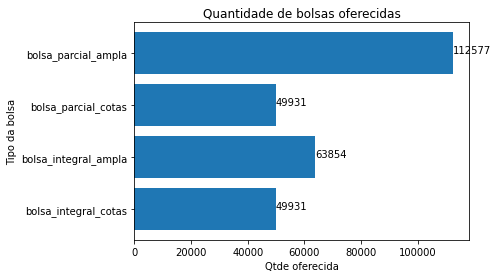


Total de bolsas oferecidas:  276293


In [ ]:
#quantidade de BOLSA_INTEGRAL_COTAS, BOLSA_INTEGRAL_AMPLA, BOLSA_PARCIAL_COTAS e BOLSA_PARCIAL_AMPLA

#construindo eixos
x = ['bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla']
y = [df_analise['BOLSA_INTEGRAL_COTAS'].sum(), df_analise['BOLSA_INTEGRAL_AMPLA'].sum(), df_analise['BOLSA_PARCIAL_COTAS'].sum(), df_analise['BOLSA_PARCIAL_AMPLA'].sum()]

#plot horizontal bar
plt.barh(x,y)

plt.title('Quantidade de bolsas oferecidas')
plt.ylabel('Tipo da bolsa')
plt.xlabel('Qtde oferecida')

#gerando numeração da quantidade de itens
for index, value in enumerate(y): 
    plt.text(value, index, 
             str(value))

# Display
plt.show()

print("\nTotal de bolsas oferecidas: ", np.sum(y))

Identificando os 10 cursos mais oferecidos pelas universidades

In [ ]:
df_analise['CURSO_BUSCA'].value_counts().head(15)

Administração                            2754
Pedagogia                                2555
Ciências Contábeis                       2056
Gestão de Recursos Humanos               1595
Educação Física                          1528
Serviço Social                           1166
Direito                                  1093
Logística                                1042
Processos Gerenciais                     1011
Análise e Desenvolvimento de Sistemas    1008
Engenharia Civil                          906
Matemática                                905
Enfermagem                                903
História                                  898
Gestão Comercial                          880
Name: CURSO_BUSCA, dtype: int64

As 10 universidades mais recorrentes

In [ ]:
df_analise['UNIVERSIDADE_NOME'].value_counts().head(10)

Centro Universitário Internacional - Uninter - UNINTER                                          7335
Universidade Paulista - UNIP                                                                    3800
Universidade Pitágoras Unopar                                                                   2163
Faculdade Educacional da Lapa - FAEL                                                            1198
Centro Universitário de Maringá - Unicesumar - Unicesumar - UNICESUMAR                          1047
Universidade Anhanguera - UNIDERP                                                               1044
Universidade Cidade de São Paulo - UNICID                                                        977
Centro Universitário Cenecista de Osório - Unicnec - UNICNEC                                     838
Centro Universitário Leonardo da VInci - UNIASSELVI                                              820
Centro Universitário Estácio de Ribeirão Preto - Estácio Ribeirão Pre - ESTÁCIO RIBEIRÃO PR

Identificando a distribuição de notas de corte: integrais (amplas), nota integral (de cotas), nota parcial(ampla) e nota parcial (de cotas) com o uso de histogramas

In [ ]:
#distribuição de notas integrais amplas
grafico =  px.histogram (df_analise, x = "NOTA_INTEGRAL_AMPLA", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas integrais amplas') 
grafico.show()

#nota integral de cotas
grafico =  px.histogram (df_analise, x = "NOTA_INTEGRAL_COTAS", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas integrais de cotas') 
grafico.show()

#nota parcial ampla
grafico =  px.histogram (df_analise, x = "NOTA_PARCIAL_AMPLA", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas parciais amplas') 
grafico.show()

#nota parcial de cotas
grafico =  px.histogram (df_analise, x = "NOTA_PARCIAL_COTAS", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de notas parciais de cotas') 
grafico.show()

## Medidas de centralidade

In [ ]:
df_analise.describe()

,MENSALIDADE,BOLSA_INTEGRAL_COTAS,BOLSA_INTEGRAL_AMPLA,BOLSA_PARCIAL_COTAS,BOLSA_PARCIAL_AMPLA,CAMPUS_ID,NOTA_INTEGRAL_AMPLA,NOTA_INTEGRAL_COTAS,NOTA_PARCIAL_AMPLA,NOTA_PARCIAL_COTAS
count,41447.000000,41447.000000,41447.000000,41447.000000,41447.000000,4.144700e+04,41447.000000,41447.000000,41447.000000,41447.000000
mean,622.636966,1.204695,1.540618,1.204695,2.716168,6.786530e+05,451.925764,228.827957,208.094800,68.150221
std,606.442296,2.041299,2.662203,2.041299,11.057922,6.398410e+05,242.259732,279.577821,260.578954,175.113886
min,139.000000,0.000000,0.000000,0.000000,0.000000,2.240000e+02,0.000000,0.000000,0.000000,0.000000
25%,278.000000,0.000000,0.000000,0.000000,0.000000,1.172300e+04,450.000000,0.000000,0.000000,0.000000
50%,393.350000,1.000000,1.000000,1.000000,0.000000,6.587550e+05,562.760000,0.000000,0.000000,0.000000
75%,825.000000,2.000000,2.000000,2.000000,1.000000,1.058794e+06,604.200000,555.800000,503.570000,0.000000
max,9999.990000,58.000000,67.000000,58.000000,350.000000,2.008633e+06,781.200000,792.240000,776.360000,768.340000


Média, moda e mediana das mensalidades dos cursos

In [ ]:
print("Média das mensalidades dos cursos:" , df_analise['MENSALIDADE'].mean())
print("Moda das mensalidades dos cursos:" , df_analise['MENSALIDADE'].mode())
print("Mediana das mensalidades dos cursos:" , df_analise['MENSALIDADE'].median())

Média das mensalidades dos cursos: 622.6369657635053
Moda das mensalidades dos cursos: 0    299.0
dtype: float64
Mediana das mensalidades dos cursos: 393.35


Média e mediana das notas de corte integrais (amplas) e integrais (de cotas)

In [ ]:
print("Média das notas de corte integrais das universidade:" , df_analise['NOTA_INTEGRAL_AMPLA'].mean())
print("Média das notas de corte integrais de cota das universidade:" , df_analise['NOTA_INTEGRAL_COTAS'].mean())

print("\nMediana das notas de corte integrais das universidade:" , df_analise['NOTA_INTEGRAL_AMPLA'].median())
print("Mediana das notas de corte integrais de cota das universidade:" , df_analise['NOTA_INTEGRAL_COTAS'].median())

print("\nMaior nota de corte integral ampla:", df_analise['NOTA_INTEGRAL_AMPLA'].max())
print("Maior nota de corte integral de cotas:", df_analise['NOTA_INTEGRAL_COTAS'].max()) 

Média das notas de corte integrais das universidade: 451.9257635051994
Média das notas de corte integrais de cota das universidade: 228.82795666755135

Mediana das notas de corte integrais das universidade: 562.76
Mediana das notas de corte integrais de cota das universidade: 0.0

Maior nota de corte integral ampla: 781.2
Maior nota de corte integral de cotas: 792.24


Gerando boxplots de notas de corte integrais - amplas e de cotas - para analisar distribuições.

nota integral ampla x grau de ensino do curso

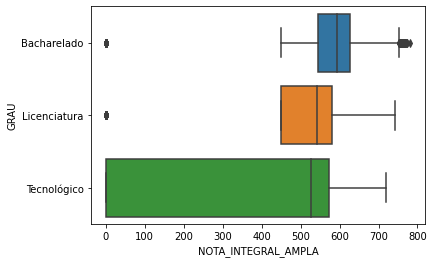

In [ ]:
sns.boxplot(data=df_analise, x="NOTA_INTEGRAL_AMPLA", y="GRAU")

nota integral de cotas x grau de ensino do curso

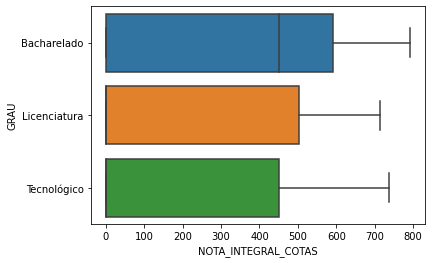

In [ ]:
sns.boxplot(data=df_analise, x="NOTA_INTEGRAL_COTAS", y="GRAU")